In [1]:
import csv
import pandas as pd
import numpy as np

import os

In [2]:
path = "./sg-data/"
desc = 'desc/'
col = 'col/'
file_list = os.listdir(path + col)

In [3]:
df = pd.read_csv(path + desc +'file_list_desc.csv', encoding='euc-kr')

df[['f_name','table_name']]
table_nm_set = {}
for f_nm, table_nm in zip(df['f_name'], df['table_name']):
    table_nm_set[table_nm] = f_nm    
# table_nm_set
table_nm_list = df['table_name']

## # table_nm_set :: 
### :: { table_nm : file_nm, ... }

In [4]:
import pickle

with open('./pickle/table_nm_set.pickle', "wb") as fw:
    pickle.dump(table_nm_set, fw)

In [5]:
def col2dict(file_nm):
    df = pd.read_csv(path + col + file_nm, encoding='euc-kr')
    arr = np.array(df)
    col_set = [ [file_col.strip(), [db_col.strip(), d_type.strip()]] for file_col, db_col, d_type in zip(df.columns, arr[0], arr[1]) ]
    
    return col_set

In [6]:
len(file_list), len(table_nm_list)

(19, 19)

In [7]:
table = {}
for table_nm, file_nm in zip(table_nm_list,file_list):
    tmp = col2dict(file_nm)
    table[table_nm] = tmp

In [8]:
import pickle

with open('./pickle/col2dict.pickle', "wb") as fw:
    pickle.dump(table, fw)

^ 여기까지 완료, v test code

In [9]:
# insert 

In [10]:
import os
# 한글 지원
os.putenv('NLS_LANG', '.UTF8')

In [11]:
def ipchecker():    
    import urllib 
    import re
    
    pattern = re.compile(b'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}')
    dyndns = urllib.request.urlopen('http://checkip.dyndns.org').read()
    
    wan = re.search(pattern, dyndns).group().decode('utf-8')
    
    return wan

In [12]:
# base db_connect param

local_ip = '200.1.220.251:1521/xe' # 원내에서 접속할 db_ip
outside_ip = '61.35.152.103:1521/xe' # 원밖에서 접속할 db_ip
localhost = 'localhost:1521/xe'

db_id = 'begopa' 
db_pwd = 'begopa1'

academy_ip = '61.35.152.66'
db_ip = local_ip if academy_ip == ipchecker() else outside_ip
# db_ip = localhost # 집에서 본인의 개인 컴퓨터에 설치된 오라클에 접속할때,
# db_ip = '127.0.0.1:1521/xe' # 그러내 컴퓨터에 설치된 DB 로 할때, 학원서버로 실행할때는 주석처리하면 됨!!

In [13]:
import pickle
# load object ::
# :: file_nm
# :: columns and data_type
with open("./pickle/col2dict.pickle","rb") as fr:
    col2dict = pickle.load(fr)
with open("./pickle/table_nm_set.pickle","rb") as fr:
    table_nm_set = pickle.load(fr)

In [14]:
path = "./sg-data/"
desc_path = path + 'desc/'
col_path = path + 'col/'
origin_path = path + 'origin/'

file_list = os.listdir(origin_path)

insert

In [15]:
# _, _, _, table_col_set_ = extract_table_columns_set(file_list[0]) # _, :: 임시로 쓰고 버리는 값.

In [16]:
# def extract_table_columns_set(file_nm):
#     for key, value in table_nm_set.items():
#         if value in file_nm:
#             table_nm = key
#             table_col_set = col2dict[table_nm]
            
#             col_nms = []
#             col_dtypes = []
            
#             for col in table_col_set:
#                 col_nms.append(col[1][0])
#                 col_dtypes.append(col[1][1])

# #             col_nms, col_dtypes = col[1][0], col[1][1] for col in table_col_set
            
#             return [table_nm , col_nms, col_dtypes, table_col_set]

In [17]:
#######################################
# Test : sqlalchemy
#######################################

# import cx_Oracle
# dsn = cx_Oracle.makedsn('200.1.220.251', 1521, sid='xe')
# print(dsn)

# from sqlalchemy import create_engine

# engine = create_engine("oracle+cx_oracle://"+db_id+":"+db_pwd+"@"+db_ip)

In [18]:
# def create_table_stmt(table_nm):
#     import re
    
#     sql = ''
    
#     for idx, col in enumerate(col2dict[table_nm]):
#         if( idx != 0 ):
#             sql += ' ,'
#         sql += col[1][0] + ' ' + col[1][1]    
    
#     stmt = ('CREATE TABLE {0}({1})'.format(table_nm, sql)).upper()
#     stmt = re.sub('VARCHAR2\((\d?\d)\)',
#                   'VARCHAR2(\g<1> CHAR)',
#                   stmt)
#     return stmt

In [19]:
# def create_insert_stmt(table_nm, columns):
#     questions = ''
#     for idx, col in enumerate(columns):
#         if idx:
#             questions += ', :{0}'.format(col)
#         else:
#             questions += ':{0}'.format(col)

#     sql = ''
#     sql = 'insert into {table_nm} values({questions})'.format(table_nm=table_nm,
#                                                                          questions = questions)
    
#     return sql

In [20]:
# def df_to_oracle(file_nm):
#     import pandas as pd
    
#     table_columns = extract_table_columns_set(file_nm)
#     table_nm = table_columns[0]
#     columns = table_columns[1]
#     dtypes = table_columns[2]
   
#     df = pd.read_csv(origin_path+file_nm, encoding='euc-kr')
#     df.fillna(0, inplace=True)
#     data = df.values.tolist()

#     del df
    
#     stmt = create_table_stmt(table_nm)
#     sql = create_insert_stmt(table_nm, columns)


#     import cx_Oracle
    
#     try:
#         # establish a new connection
#         with cx_Oracle.connect(db_id, db_pwd, db_ip, encoding="UTF-8") as connection:
#             # create a cursor
#             with connection.cursor() as cursor:
#                 # execute the create statement
#                 cursor.execute(stmt)

#                 # execute the insert statement                
#                 cursor.execute('DELETE FROM ' + table_nm)
#                 cursor.executemany(sql, data)
                                                
#                 # execute the 'DROP TABLE' statement
# #                 cursor.execute('DROP TABLE ' + table_nm)

#                 # commit work
#                 connection.commit()
#     except cx_Oracle.Error as error:
#         print('Error occurred:')
#         print(error)
        
#     print('done')

In [21]:
# # 각 엑셀 파일 컬럼 영문으로 변경하면서 db 에 넣기
# for file_nm in file_list:
#     print(file_nm)
#     df_to_oracle(file_nm)
# # df_to_oracle('02.상권분석서비스(상권-집객시설).csv')

In [22]:
# 자치구별 상권 변화지표 db 에서 한글 컬럼으로 가져오기
# oracle_to_df('자치구별 상권변화지표')
def load_to_df(kr_tbl_nm):
    for key, value in table_nm_set.items():
        if kr_tbl_nm == value:
            table_nm = key
            columns = [ arr[0] for arr in col2dict[key] ]
           
    import cx_Oracle
    import pandas as pd
    
    db = cx_Oracle.connect(db_id, db_pwd, db_ip) 
        
    sql = 'select * from ' + table_nm

    df = pd.read_sql(sql=sql, con = db) 
    df.columns = columns
    db.close
    
    return df

In [23]:
import re
import os

file_list = os.listdir(origin_path)
for file in file_list:
    kr_tbl_nm = re.findall('(\d\d).*\((.*)\)',file)
    print(kr_tbl_nm[0][0], kr_tbl_nm[0][1])

00 상권-영역
01 상권-추정유동인구
02 상권-집객시설
03 상권배후지-추정유동인구
04 상권배후지-집객시설
05 상권배후지-상주인구
06 상권-상주인구
07 상권배후지-아파트
08 상권배후지-점포
09 상권-상권변화지표
10 행정동별 상권변화지표
11 상권-추정매출
12 상권-직장인구
13 상권배후지-소득소비
14 상권배후지-직장인구
15 자치구별 상권변화지표
16 상권-아파트
18 상권-점포
19 상권배후지-추정매출


In [24]:
def multi_columns_merging(sg, sg_hl):
    a_df = load_to_df( sg )
    b_df = load_to_df( sg_hl )
    all_df = pd.merge(left=a_df, right=b_df, how='left', \
                  on=['기준_년_분기_코드','상권_코드'], sort=False)
#     del a_df, b_df
    all_df2 = all_df.drop(all_df.filter(regex='연령대|시간대'),axis=1)
    return all_df2.dropna(axis=0)

col = ['요일']
target=['연령대','시간대']
def drop_filter(df1,target):
    df_a=df1.drop(df1.filter(regex='|'.join(target)),axis=1)
    return df_a 

def multi_merge(a_df, b_df):
    all_df = pd.merge(left=a_df, right=b_df, how='left', on=['기준_년_분기_코드','상권_코드'], sort=False)
    all_df = all_df.drop(all_df.filter(regex='연령대|시간대'),axis=1)
    return all_df.dropna(axis=0)

def multi_columns_merging2(df, sg):
    a_df = load_to_df( sg )
    all_df = pd.merge(left=df, right=a_df, how='left', \
                  on=['기준_년_분기_코드','상권_코드'], sort=False)
#     del a_df, b_df
    all_df2 = all_df.drop(all_df.filter(regex='연령대|시간대'),axis=1)
    return all_df2.dropna(axis=0)

In [26]:
df0=pd.read_csv('data/00.상권분석서비스(상권-영역).csv', encoding='utf-8')
df10 = load_to_df('행정동별 상권변화지표')
df15=load_to_df( '자치구별 상권변화지표' )
df9=load_to_df('상권-상권변화지표')

df10[df10.columns[1:2]]=df10[df10.columns[1:2]].astype('int64')
df15[df15.columns[1:2]]=df15[df15.columns[1:2]].astype('int64')
df9[df9.columns[1:2]]=df9[df9.columns[1:2]].astype('int64')

DatabaseError: ORA-12170: TNS:Connect timeout occurred

In [26]:
df10_1=df10[['행정동_코드','행정동_코드_명']]
df15_1=df15[["시군구_코드",'시군구_코드_명']]

# df10.info()

In [27]:
df20 = load_to_df('상권-상주인구')

In [28]:
map_df=df0.merge(df15_1 , on='시군구_코드').drop_duplicates()
map_df=map_df.merge(df10_1 , on='행정동_코드').drop_duplicates()
map_df.columns
map_df1=map_df[['상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명', '시군구_코드', '행정동_코드', '시군구_코드_명','행정동_코드_명']]
map_df1.info()
map_df1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1496 entries, 0 to 38182
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   상권_구분_코드    1496 non-null   object
 1   상권_구분_코드_명  1496 non-null   object
 2   상권_코드       1496 non-null   int64 
 3   상권_코드_명     1496 non-null   object
 4   시군구_코드      1496 non-null   int64 
 5   행정동_코드      1496 non-null   int64 
 6   시군구_코드_명    1496 non-null   object
 7   행정동_코드_명    1496 non-null   object
dtypes: int64(3), object(5)
memory usage: 105.2+ KB


,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,시군구_코드,행정동_코드,시군구_코드_명,행정동_코드_명
0,R,전통시장,1001453,낙성대시장,11620,11620585,관악구,낙성대동
25,A,골목상권,1000799,남부순환로234길,11620,11620585,관악구,낙성대동
50,A,골목상권,1000780,관악로10길,11620,11620585,관악구,낙성대동
75,A,골목상권,1000781,관악로14길,11620,11620585,관악구,낙성대동
100,R,전통시장,1001454,봉천제일종합시장,11620,11620595,관악구,청룡동
...,...,...,...,...,...,...,...,...
38078,D,발달상권,1001258,등나무근린공원 주변,11350,11350625,노원구,중계2.3동
38105,D,발달상권,1001261,서울 노원구 노원역_1,11350,11350695,노원구,상계6.7동
38130,D,발달상권,1001262,서울 노원구 노원역_2,11350,11350695,노원구,상계6.7동
38155,A,골목상권,1000378,공릉로58길,11350,11350611,노원구,하계1동


# 인구 총 합 (유동, 상주, 직장인구수)

In [29]:
df20 = load_to_df('상권-상주인구')
df20[df20.columns[1:2]]=df20[df20.columns[1:2]].astype('int64')
df20=df20.merge(map_df1 , on = '상권_코드').drop_duplicates()

In [30]:
pop_df1=multi_columns_merging('상권-추정유동인구', '상권-상주인구')

In [31]:
target3=['월요','화요','수요','목요','금요']
target4=['토요','일요']
def add_week2(df,target3,target4):
    df['주중_유동인구_수']=df.filter(regex='|'.join(target3)).sum(axis=1)
    df['주말_유동인구_수']=df.filter(regex='|'.join(target4)).sum(axis=1)
    df_a=df.drop(df.filter(regex='|'.join(target3+target4)),axis=1)
    return df_a

In [32]:
pop_df2=add_week2(pop_df1,target3,target4)
pop_df2   #2962

,기준_년_분기_코드,상권_코드,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,총_상주인구_수,남성_상주인구_수,여성_상주인구_수,총_가구_수,아파트_가구_수,비_아파트_가구_수,주중_유동인구_수,주말_유동인구_수
0,2019_1,1000001,118266,61268,56997,1806.0,851.0,955.0,785.0,0.0,785.0,86815,31451
1,2019_1,1000002,246619,147358,99261,841.0,383.0,458.0,775.0,8.0,767.0,156385,90234
2,2019_1,1000003,144480,80073,64407,1214.0,682.0,532.0,805.0,0.0,805.0,107665,36815
3,2019_1,1000012,166390,70339,96051,2586.0,1163.0,1423.0,1087.0,111.0,976.0,121377,45018
4,2019_1,1000013,65518,33437,32080,249.0,147.0,102.0,166.0,0.0,166.0,46747,18769
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985,2019_2,1001325,109383,60736,48646,58.0,41.0,17.0,46.0,0.0,46.0,82138,27244
2986,2019_2,1001379,112258,51637,60622,308.0,153.0,155.0,160.0,45.0,115.0,82726,29532
2987,2019_2,1001380,134058,70806,63253,510.0,255.0,255.0,250.0,0.0,250.0,88801,45257
2988,2019_2,1001381,39190,18328,20862,384.0,195.0,189.0,233.0,0.0,233.0,27663,11527


In [33]:
pop_df3=multi_columns_merging2(pop_df2,'상권-직장인구')
pop_df3[pop_df3.columns[1:2]]=pop_df3[pop_df3.columns[1:2]].astype('int64')
pop_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2960 entries, 0 to 2961
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   기준_년_분기_코드  2960 non-null   object 
 1   상권_코드       2960 non-null   int64  
 2   총_유동인구_수    2960 non-null   int64  
 3   남성_유동인구_수   2960 non-null   int64  
 4   여성_유동인구_수   2960 non-null   int64  
 5   총_상주인구_수    2960 non-null   float64
 6   남성_상주인구_수   2960 non-null   float64
 7   여성_상주인구_수   2960 non-null   float64
 8   총_가구_수      2960 non-null   float64
 9   아파트_가구_수    2960 non-null   float64
 10  비_아파트_가구_수  2960 non-null   float64
 11  주중_유동인구_수   2960 non-null   int64  
 12  주말_유동인구_수   2960 non-null   int64  
 13  총_직장_인구_수   2960 non-null   float64
 14  남성_직장_인구_수  2960 non-null   float64
 15  여성_직장_인구_수  2960 non-null   float64
dtypes: float64(9), int64(6), object(1)
memory usage: 393.1+ KB


In [34]:
people_df=pop_df3.merge(map_df1, on=['상권_코드']).drop_duplicates()

In [35]:
# 비율 구하기
def ratio(df,col1,col2):
    total = df[col1]+df[col2]
    total2 = df[col1]/total*100
    return total2.round(2)

In [36]:
# people_df['남성_유동인구_비율']=ratio(people_df,'남성_유동인구_수', '여성_유동인구_수')
# people_df['여성_유동인구_비율']=ratio(people_df,'여성_유동인구_수', '남성_유동인구_수')
# people_df['주중_유동인구_비율']=ratio(people_df,'주중_유동인구_수', '주말_유동인구_수')
# people_df['주말_유동인구_비율']=ratio(people_df,'주말_유동인구_수', '주중_유동인구_수')

# people_df['남성_상주인구_비율']=ratio(people_df,'남성_상주인구_수', '여성_상주인구_수')
# people_df['여성_상주인구_비율']=ratio(people_df,'여성_상주인구_수', '남성_상주인구_수')

# people_df['남성_직장인구_비율']=ratio(people_df,'남성_직장_인구_수', '여성_직장_인구_수')
# people_df['여성_직장인구_비율']=ratio(people_df,'여성_직장_인구_수', '남성_직장_인구_수')

In [37]:
people_df.columns

Index(['기준_년_분기_코드', '상권_코드', '총_유동인구_수', '남성_유동인구_수', '여성_유동인구_수', '총_상주인구_수',
       '남성_상주인구_수', '여성_상주인구_수', '총_가구_수', '아파트_가구_수', '비_아파트_가구_수',
       '주중_유동인구_수', '주말_유동인구_수', '총_직장_인구_수', '남성_직장_인구_수', '여성_직장_인구_수',
       '상권_구분_코드', '상권_구분_코드_명', '상권_코드_명', '시군구_코드', '행정동_코드', '시군구_코드_명',
       '행정동_코드_명'],
      dtype='object')

In [38]:
people_data=people_df[['기준_년_분기_코드','상권_구분_코드_명','상권_코드_명','시군구_코드_명', '행정동_코드_명',
                       '총_유동인구_수', '총_상주인구_수','총_직장_인구_수', '남성_유동인구_수', '여성_유동인구_수', 
                       '주중_유동인구_수','주말_유동인구_수','남성_상주인구_수', '여성_상주인구_수', 
                       '남성_직장_인구_수','여성_직장_인구_수']]
people_data   # 유동인구, 상주인구, 직장인구
# people_data = people_data.round(2)
people_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2960 entries, 0 to 2959
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   기준_년_분기_코드  2960 non-null   object 
 1   상권_구분_코드_명  2960 non-null   object 
 2   상권_코드_명     2960 non-null   object 
 3   시군구_코드_명    2960 non-null   object 
 4   행정동_코드_명    2960 non-null   object 
 5   총_유동인구_수    2960 non-null   int64  
 6   총_상주인구_수    2960 non-null   float64
 7   총_직장_인구_수   2960 non-null   float64
 8   남성_유동인구_수   2960 non-null   int64  
 9   여성_유동인구_수   2960 non-null   int64  
 10  주중_유동인구_수   2960 non-null   int64  
 11  주말_유동인구_수   2960 non-null   int64  
 12  남성_상주인구_수   2960 non-null   float64
 13  여성_상주인구_수   2960 non-null   float64
 14  남성_직장_인구_수  2960 non-null   float64
 15  여성_직장_인구_수  2960 non-null   float64
dtypes: float64(6), int64(5), object(5)
memory usage: 393.1+ KB


In [39]:
t=people_df[['기준_년_분기_코드','상권_구분_코드_명','상권_코드_명','시군구_코드_명', '행정동_코드_명','총_가구_수']]
# t.info()
t.iloc[:,5:]=t.iloc[:,5:].astype('int64')
# t.info()
t1=t[t['기준_년_분기_코드']=='2019_1']
# t1['총_가구_수'].sum()
t

c:\programdata\miniconda3\envs\hoseo\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,기준_년_분기_코드,상권_구분_코드_명,상권_코드_명,시군구_코드_명,행정동_코드_명,총_가구_수
0,2019_1,골목상권,계동길,종로구,가회동,785
1,2019_2,골목상권,계동길,종로구,가회동,785
2,2019_1,골목상권,난계로27길,종로구,숭인2동,775
3,2019_2,골목상권,난계로27길,종로구,숭인2동,775
4,2019_1,골목상권,돈화문로11가길,종로구,종로1.2.3.4가동,805
...,...,...,...,...,...,...
2955,2019_1,발달상권,서울 강북구 수유역_3,강북구,수유3동,510
2956,2019_2,발달상권,서울 강북구 수유역_3,강북구,수유3동,510
2957,2019_1,발달상권,창동역,도봉구,창4동,483
2958,2019_2,발달상권,창동역,도봉구,창4동,483


In [40]:
# people_data=people_data.astype({'총_상주인구_수': int,'총_직장_인구_수':int})
# people_data.info()
# people_data.iloc[:,5:]
people_data.iloc[:,5:] = people_data.iloc[:,5:].astype('int64')
# people_data.info()
# people_data[people_data['시군구_코드_명'] == '강남구']

c:\programdata\miniconda3\envs\hoseo\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [41]:
people_data_en=people_data.rename(columns={'기준_년_분기_코드':'yesrSe','상권_구분_코드_명':'sgSeCdName', '상권_코드_명':'sgCdName','시군구_코드_명':'guName', '행정동_코드_명':'dongName',
                       '총_유동인구_수':'totalFlowPop', '총_상주인구_수':'totalStayPop','총_직장_인구_수':'totalOffPop', '남성_유동인구_수':'menFlowCnt', '여성_유동인구_수':'womenFlowCnt', 
                       '주중_유동인구_수':'weekdayFlowCnt','주말_유동인구_수':'weekendFlowCnt','남성_상주인구_수':'menStayCnt', '여성_상주인구_수':'womenStayCnt', 
                       '남성_직장_인구_수':'menOffRaitoCnt','여성_직장_인구_수':'womenOffCnt'})

In [42]:
people_data_en=people_data_en.replace('2019_2', '2019년2분기').replace('2019_1','2019년1분기')

In [43]:
# col2dict
# people_data_en.to_csv('people_data_en.csv', index=False)

In [44]:
people_data_en

,yesrSe,sgSeCdName,sgCdName,guName,dongName,totalFlowPop,totalStayPop,totalOffPop,menFlowCnt,womenFlowCnt,weekdayFlowCnt,weekendFlowCnt,menStayCnt,womenStayCnt,menOffRaitoCnt,womenOffCnt
0,2019년1분기,골목상권,계동길,종로구,가회동,118266,1806,348,61268,56997,86815,31451,851,955,142,206
1,2019년2분기,골목상권,계동길,종로구,가회동,167204,1806,609,82096,85105,118416,48780,851,955,224,385
2,2019년1분기,골목상권,난계로27길,종로구,숭인2동,246619,841,486,147358,99261,156385,90234,383,458,254,232
3,2019년2분기,골목상권,난계로27길,종로구,숭인2동,303115,841,348,179132,123984,183408,119707,383,458,159,189
4,2019년1분기,골목상권,돈화문로11가길,종로구,종로1.2.3.4가동,144480,1214,4822,80073,64407,107665,36815,682,532,2188,2634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2955,2019년1분기,발달상권,서울 강북구 수유역_3,강북구,수유3동,215107,730,250,109172,105937,153382,61724,427,303,112,138
2956,2019년2분기,발달상권,서울 강북구 수유역_3,강북구,수유3동,252008,730,97,126397,125611,178811,73198,427,303,49,48
2957,2019년1분기,발달상권,창동역,도봉구,창4동,843464,627,1964,468748,374713,596215,247245,377,250,1023,941
2958,2019년2분기,발달상권,창동역,도봉구,창4동,1038938,627,1106,563118,475820,718508,320429,377,250,645,461


In [45]:
corr_matrix_1=people_data_en.corr()

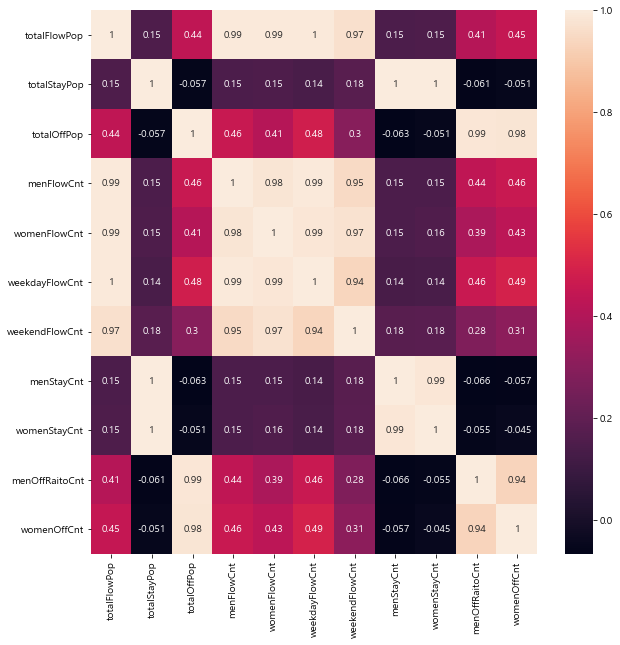

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
plt.rc('font', family = 'malgun gothic', size=10)
sns.heatmap(corr_matrix_1, annot=True)
plt.show()

# 서비스업종 매출

In [47]:
df18=load_to_df( '상권-점포' )
df11=load_to_df( '상권-추정매출' )

In [48]:
# store_sales=multi_columns_merging('상권-점포', '상권-추정매출')
df11_18=df11.merge(df18, on=['기준_년_분기_코드','상권_코드','서비스_업종_코드','서비스_업종_코드_명']).drop_duplicates()
df11_18[df11_18.columns[1:2]]=df11_18[df11_18.columns[1:2]].astype('int64')
# df11_18.info()

In [49]:
df11_18=df11.merge(df18, on=['기준_년_분기_코드','상권_코드','서비스_업종_코드','서비스_업종_코드_명']).drop_duplicates()
df11_18[df11_18.columns[1:2]]=df11_18[df11_18.columns[1:2]].astype('int64')
# df11_18.info()

In [50]:
df11_18=df11_18.drop(df11_18.filter(regex='|'.join('연령대,시간대,요일')),axis=1)
# df11_18.info()

In [51]:
store_sales=df11_18.merge(map_df1, on='상권_코드').drop_duplicates()

In [52]:
store_sales.columns

Index(['기준_년_분기_코드', '상권_코드', '서비스_업종_코드', '서비스_업종_코드_명', '점포수', '당월_매출_금액',
       '당월_매출_건수', '주중_매출_비율', '주말_매출_비율', '남성_매출_비율', '여성_매출_비율', '주중_매출_금액',
       '주말_매출_금액', '남성_매출_금액', '여성_매출_금액', '주중_매출_건수', '주말_매출_건수', '남성_매출_건수',
       '여성_매출_건수', '점포_수', '유사_업종_점포_수', '개업_율', '개업_점포_수', '폐업_률', '폐업_점포_수',
       '프랜차이즈_점포_수', '상권_구분_코드', '상권_구분_코드_명', '상권_코드_명', '시군구_코드', '행정동_코드',
       '시군구_코드_명', '행정동_코드_명'],
      dtype='object')

In [53]:
# store_sales['주중_매출_비율']=ratio(store_sales,'주중_매출_금액','주말_매출_금액')
# store_sales['주말_매출_비율']=ratio(store_sales,'주말_매출_금액','주중_매출_금액')
# store_sales['남성_매출_비율']=ratio(store_sales,'남성_매출_금액','여성_매출_금액')
# store_sales['여성_매출_비율']=ratio(store_sales,'여성_매출_금액','남성_매출_금액')

In [54]:
store_sales.head()

,기준_년_분기_코드,상권_코드,서비스_업종_코드,서비스_업종_코드_명,점포수,당월_매출_금액,당월_매출_건수,주중_매출_비율,주말_매출_비율,남성_매출_비율,...,폐업_률,폐업_점포_수,프랜차이즈_점포_수,상권_구분_코드,상권_구분_코드_명,상권_코드_명,시군구_코드,행정동_코드,시군구_코드_명,행정동_코드_명
0,2019_2,1001496,CS300043,전자상거래업,7,20931734,13998,71,29,45,...,14,1,0,U,관광특구,강남 마이스 관광특구,11680,11680580,강남구,삼성1동
1,2019_2,1001496,CS300035,인테리어,4,2000367097,48419,69,31,23,...,25,1,0,U,관광특구,강남 마이스 관광특구,11680,11680580,강남구,삼성1동
2,2019_2,1001496,CS300032,가전제품,8,2301647043,11720,68,33,43,...,0,0,0,U,관광특구,강남 마이스 관광특구,11680,11680580,강남구,삼성1동
3,2019_2,1001496,CS300028,화초,6,1356873015,33215,71,29,52,...,0,0,0,U,관광특구,강남 마이스 관광특구,11680,11680580,강남구,삼성1동
4,2019_2,1001496,CS300027,섬유제품,7,2130125149,62318,62,38,18,...,0,0,0,U,관광특구,강남 마이스 관광특구,11680,11680580,강남구,삼성1동


In [55]:
store_sale_df=store_sales[['기준_년_분기_코드', '상권_구분_코드_명', '상권_코드_명', '시군구_코드_명', '행정동_코드_명',
                           '서비스_업종_코드_명', '당월_매출_금액', '주중_매출_금액','주말_매출_금액', '남성_매출_금액', '여성_매출_금액',
                           '주중_매출_건수', '주말_매출_건수', '남성_매출_건수','여성_매출_건수',
                           '점포수', '유사_업종_점포_수','프랜차이즈_점포_수']]
store_sale_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95549 entries, 0 to 95548
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   기준_년_분기_코드   95549 non-null  object
 1   상권_구분_코드_명   95549 non-null  object
 2   상권_코드_명      95549 non-null  object
 3   시군구_코드_명     95549 non-null  object
 4   행정동_코드_명     95549 non-null  object
 5   서비스_업종_코드_명  95549 non-null  object
 6   당월_매출_금액     95549 non-null  int64 
 7   주중_매출_금액     95549 non-null  int64 
 8   주말_매출_금액     95549 non-null  int64 
 9   남성_매출_금액     95549 non-null  int64 
 10  여성_매출_금액     95549 non-null  int64 
 11  주중_매출_건수     95549 non-null  int64 
 12  주말_매출_건수     95549 non-null  int64 
 13  남성_매출_건수     95549 non-null  int64 
 14  여성_매출_건수     95549 non-null  int64 
 15  점포수          95549 non-null  int64 
 16  유사_업종_점포_수   95549 non-null  int64 
 17  프랜차이즈_점포_수   95549 non-null  int64 
dtypes: int64(12), object(6)
memory usage: 13.9+ MB


In [56]:
store_sale_df_en = store_sale_df.rename(columns={'기준_년_분기_코드':'yesrSe','상권_구분_코드_명':'sgSeCdName', '상권_코드_명':'sgCdName','시군구_코드_명':'guName', '행정동_코드_명':'dongName',
                                                 '서비스_업종_코드_명':'serviceKind', '당월_매출_금액':'monthSales',
                                                 '주중_매출_금액':'weekdaySales', '주말_매출_금액':'weekendSales', '남성_매출_금액':'menSales', '여성_매출_금액':'womenSales', 
                                                 '주중_매출_건수':'weekdaySalesCnt', '주말_매출_건수':'weekendSalesCnt', '남성_매출_건수':'menSalesCnt','여성_매출_건수':'womenSalesCnt',
                                                 '점포수':'storeCnt','유사_업종_점포_수':'similerStoreCnt','프랜차이즈_점포_수':'franchiseCnt'})
store_sale_df_en.columns

Index(['yesrSe', 'sgSeCdName', 'sgCdName', 'guName', 'dongName', 'serviceKind',
       'monthSales', 'weekdaySales', 'weekendSales', 'menSales', 'womenSales',
       'weekdaySalesCnt', 'weekendSalesCnt', 'menSalesCnt', 'womenSalesCnt',
       'storeCnt', 'similerStoreCnt', 'franchiseCnt'],
      dtype='object')

In [57]:
# store_sale_df_en.to_csv('store_sale_df_en.csv', index=False)

In [58]:
test=store_sale_df.groupby(['기준_년_분기_코드','상권_구분_코드_명','시군구_코드_명']).sum().reset_index()
tess=test[test['기준_년_분기_코드']=='2019_1']
tess['상권_구분_코드_명'].unique()
test

,기준_년_분기_코드,상권_구분_코드_명,시군구_코드_명,당월_매출_금액,주중_매출_금액,주말_매출_금액,남성_매출_금액,여성_매출_금액,주중_매출_건수,주말_매출_건수,남성_매출_건수,여성_매출_건수,점포수,유사_업종_점포_수,프랜차이즈_점포_수
0,2019_1,골목상권,강남구,541090334983,396866655185,144223679798,241853179982,230147903536,14623441,4273116,9628317,8111038,8966,7890,586
1,2019_1,골목상권,강동구,293158986928,217123089166,76035897762,152694437725,125878544718,10902052,4214455,8684295,6180103,7390,6610,636
2,2019_1,골목상권,강북구,153009447709,109193365406,43816082303,75841003833,70899715219,6133272,2558976,4705900,3901535,4294,3792,286
3,2019_1,골목상권,강서구,325848258074,239311605271,86536652803,164706954899,133677119893,11358191,4545732,9099718,6488682,7798,7057,622
4,2019_1,골목상권,관악구,324543226091,232215900740,92327325351,175556827378,139003048779,16462959,7052393,14321933,9029200,7716,6929,634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,2019_2,전통시장,용산구,45891099589,32621407280,13269692309,17091664892,24819513171,1402663,593310,807963,1112515,844,767,31
154,2019_2,전통시장,은평구,36556331586,27191227116,9365104470,14337553134,20106397766,1176480,475250,716886,910569,748,693,23
155,2019_2,전통시장,종로구,76316600462,55019336839,21297263623,28617353316,42816272344,1609108,580808,1031383,1088980,2565,1784,29
156,2019_2,전통시장,중구,445417438451,311000607734,134416830717,166084959492,259088966087,6771229,2571160,3776084,5256553,12008,11414,161


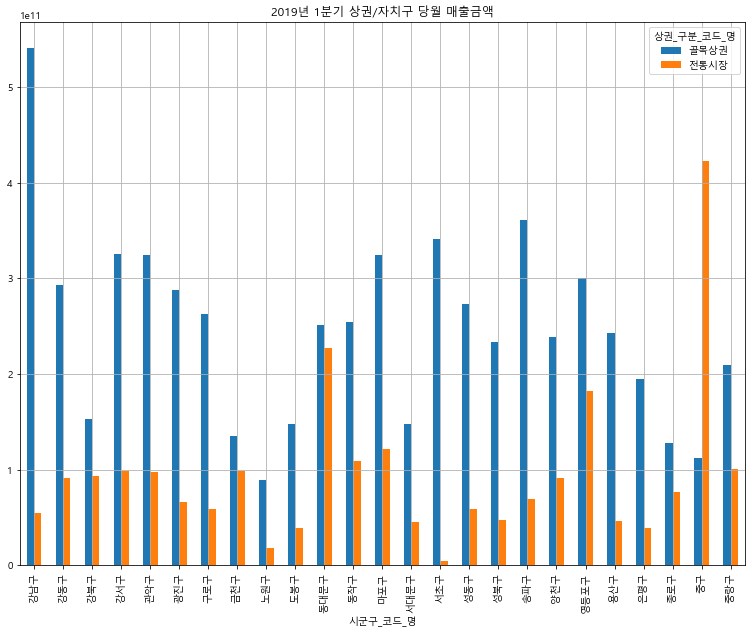

In [59]:
import matplotlib.pyplot as plt

plt.rc('font', family="Malgun Gothic")

# test_5=store_sale_df[store_sale_df['기준_년_분기_코드']=='2019_1']
# t5=test_5[['상권_코드_명','시군구_코드_명','점포수']]
# t5.groupby(['상권_코드_명','시군구_코드_명'])['점포수'].sum().reset_index()
# t1 = test_df.groupby(['서비스_업종_코드_명','상권_코드_명'])['당월_매출_금액'].sum().unstack()
# t1
# t1.plot(kind='bar', grid=True, figsize=(13,10) ,title="2019년 1분기 상권/자치구 당월 매출금액" )
# plt.show()

test_1=test[test['기준_년_분기_코드']=='2019_1']
test_df=test_1.loc[:, ['시군구_코드_명','상권_구분_코드_명','당월_매출_금액']]
test_df
t1 = test_df.groupby(['시군구_코드_명','상권_구분_코드_명'])['당월_매출_금액'].sum().unstack().fillna('0')
t1
t1.plot(kind='bar', grid=True, figsize=(13,10) ,title="2019년 1분기 상권/자치구 당월 매출금액" )
plt.show()


# import matplotlib.pyplot as plt
# plt.rc('font', family="Malgun Gothic")

# test_2=test[test['기준_년_분기_코드']=='2019_2']
# test_df2=test_2.loc[:, ['시군구_코드_명','상권_구분_코드_명','당월_매출_금액']]
# test_df2
# t2 = test_df2.groupby(['시군구_코드_명','상권_구분_코드_명'])['당월_매출_금액'].sum().unstack()
# # t1
# t2.plot(kind='bar', grid=True, figsize=(13,10) ,title="2019년 2분기 상권/자치구 당월 매출금액" )
# plt.show()


# import matplotlib.pyplot as plt
# plt.rc('font', family="Malgun Gothic")

# s1=test.loc[:, ['기준_년_분기_코드','시군구_코드_명','상권_구분_코드_명','당월_매출_금액']] #.sort_values(by=['시군구_코드_명','기준_년_분기_코드'])

# s1
# s2 = s1.groupby(['기준_년_분기_코드','시군구_코드_명','상권_구분_코드_명'])['당월_매출_금액'].sum().unstack().sort_values(by=['시군구_코드_명'])
# s2
# s2.plot(kind='bar', grid=True, figsize=(15,15) ,title="2019년 상권/자치구 당월 매출금액" )
# plt.show()

In [60]:
df100=store_sales[['기준_년_분기_코드', '상권_구분_코드_명', '상권_코드_명', '시군구_코드_명', '행정동_코드_명',
                           '서비스_업종_코드_명', '당월_매출_금액', '주중_매출_금액','주말_매출_금액', '남성_매출_금액', '여성_매출_금액',
                           '점포수', '유사_업종_점포_수','프랜차이즈_점포_수']]

In [96]:
corr_matrix_2=store_sale_df_en.corr()

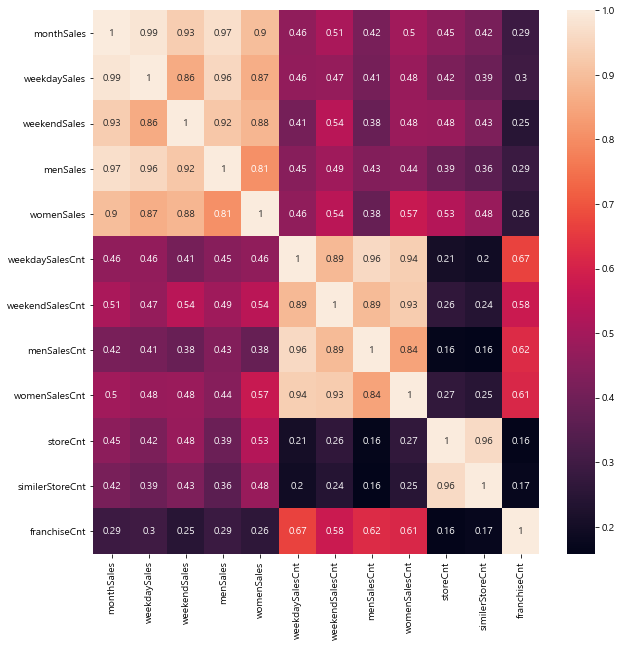

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
plt.rc('font', family = 'malgun gothic', size=10)
sns.heatmap(corr_matrix_2, annot=True)
plt.show()

In [85]:
people_data_en.to_csv('data1/people_data_en.csv', index=False)
store_sale_df_en.to_csv('data1/store_sale_df_en.csv', index=False)

In [62]:
import pandas as pd
import numpy as np

all_dong=pd.read_csv('all_dong.csv', encoding='utf-8')

In [63]:
all_dong.columns
all_dong2=all_dong[['기준_년_분기_코드', '상권_구분_코드_명', '상권_코드_명', '시군구_코드_명', '행정동_코드_명',
                   '서비스_업종_코드_명', '점포_수', '당월_매출_금액', '당월_매출_건수', '주중_매출_금액', '주말_매출_금액',
                   '남성_매출_금액', '여성_매출_금액', '유사_업종_점포_수', '프랜차이즈_점포_수', '개업_점포_수',
                   '폐업_점포_수', '남성_유동인구_수', '여성_유동인구_수', '주중_유동인구_수', '주말_유동인구_수',
                   '남성_상주인구_수', '여성_상주인구_수', '남성_직장_인구_수', '여성_직장_인구_수',
                   '동_영업_개월_평균', '동_폐업_개월_평균', '서울_영업_개월_평균', '서울_폐업_개월_평균', '동_상권_변화지표']]

In [64]:
all_dong2.rename(columns={'기준_년_분기_코드':'yesrSe','상권_구분_코드_명':'sgSeCdName', '상권_코드_명':'sgCdName','시군구_코드_명':'guName', '행정동_코드_명':'dongName',
                         '서비스_업종_코드_명':'serviceKind', '당월_매출_금액':'monthSales','당월_매출_건수':'monthSalesCnt',
                         '주중_매출_금액':'weekdaySales', '주말_매출_금액':'weekendSales', '남성_매출_금액':'menSales', '여성_매출_금액':'womenSales',
                         '점포_수':'storeCnt','유사_업종_점포_수':'similerStoreCnt','프랜차이즈_점포_수':'franchiseCnt','개업_점포_수':'openStoreCnt', '폐업_점포_수':'closeStoreCnt', 
                         '남성_유동인구_수':'menFlowCnt', '여성_유동인구_수':'womenFlowCnt','주중_유동인구_수':'weekdayFlowCnt','주말_유동인구_수':'weekendFlowCnt',
                         '남성_상주인구_수':'menStayCnt', '여성_상주인구_수':'womenStayCnt', '남성_직장_인구_수':'menOffRaitoCnt','여성_직장_인구_수':'womenOffCnt',
                         '동_영업_개월_평균':'dongOpenMonthlyMean', '동_폐업_개월_평균':'dongCloseMonthlyMean', 
                         '서울_영업_개월_평균':'seoulOpenMonthlyMean', '서울_폐업_개월_평균':'seoulCloseMonthlyMean','동_상권_변화지표':'dongChangePoint'})

,yesrSe,sgSeCdName,sgCdName,guName,dongName,serviceKind,storeCnt,monthSales,monthSalesCnt,weekdaySales,...,weekendFlowCnt,menStayCnt,womenStayCnt,menOffRaitoCnt,womenOffCnt,dongOpenMonthlyMean,dongCloseMonthlyMean,seoulOpenMonthlyMean,seoulCloseMonthlyMean,dongChangePoint
0,2019_2,관광특구,강남 마이스 관광특구,강남구,삼성1동,전자상거래업,7,20931734,13998,13222929,...,19482,17,9,10279,8151,107,56,108,53,LH
1,2019_2,관광특구,강남 마이스 관광특구,강남구,삼성1동,인테리어,4,2000367097,48419,1285669765,...,19482,17,9,10279,8151,107,56,108,53,LH
2,2019_2,관광특구,강남 마이스 관광특구,강남구,삼성1동,가전제품,8,2301647043,11720,1722002410,...,19482,17,9,10279,8151,107,56,108,53,LH
3,2019_2,관광특구,강남 마이스 관광특구,강남구,삼성1동,화초,6,1356873015,33215,1089464712,...,19482,17,9,10279,8151,107,56,108,53,LH
4,2019_2,관광특구,강남 마이스 관광특구,강남구,삼성1동,섬유제품,7,2130125149,62318,1281196916,...,19482,17,9,10279,8151,107,56,108,53,LH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85821,2019_1,골목상권,다산로36길,중구,동화동,스포츠 강습,1,24316316,2118,22229207,...,39136,993,1029,208,188,108,53,107,53,HH
85822,2019_1,골목상권,다산로36길,중구,동화동,예술학원,2,34314797,279,34314797,...,39136,993,1029,208,188,110,51,107,53,HL
85823,2019_1,골목상권,다산로36길,중구,동화동,예술학원,2,34314797,279,34314797,...,39136,993,1029,208,188,108,53,107,53,HH
85824,2019_1,골목상권,다산로36길,중구,동화동,분식전문점,5,28312199,1700,16022790,...,39136,993,1029,208,188,110,51,107,53,HL


In [65]:
test1=all_dong[['기준_년_분기_코드', '상권_구분_코드_명', '상권_코드_명', '시군구_코드_명', '행정동_코드_명',
                   '서비스_업종_코드_명', '점포_수', '당월_매출_금액', '당월_매출_건수', '주중_매출_금액', '주말_매출_금액',
                   '남성_매출_금액', '여성_매출_금액', '유사_업종_점포_수', '프랜차이즈_점포_수', '개업_점포_수',
                   '폐업_점포_수']]
df9

,기준_년_분기_코드,상권_코드,상권_변화_지표,상권_변화_지표_명,운영_영업_개월_평균,폐업_영업_개월_평균,서울_운영_영업_개월_평균,서울_폐업_영업_개월_평균
0,2020_1,1001496,HH,정체,118,61,110,54
1,2020_1,1001495,LL,다이나믹,103,53,110,54
2,2020_1,1001494,HH,정체,147,71,110,54
3,2020_1,1001493,HH,정체,119,61,110,54
4,2020_1,1001492,HH,정체,147,62,110,54
...,...,...,...,...,...,...,...,...
37395,2014_4,1001258,LL,다이나믹,67,45,94,46
37396,2014_4,1001257,LL,다이나믹,83,45,94,46
37397,2014_4,1001256,LL,다이나믹,91,43,94,46
37398,2014_4,1001255,LL,다이나믹,65,38,94,46


In [66]:

tt=map_df[['상권_코드','상권_코드_명']]

df9=df9.merge(tt, on='상권_코드').drop_duplicates()
df9.columns

Index(['기준_년_분기_코드', '상권_코드', '상권_변화_지표', '상권_변화_지표_명', '운영_영업_개월_평균',
       '폐업_영업_개월_평균', '서울_운영_영업_개월_평균', '서울_폐업_영업_개월_평균', '상권_코드_명'],
      dtype='object')

In [67]:
df9=df9[['기준_년_분기_코드','상권_코드_명','상권_변화_지표_명' ]]

In [68]:
choice=test1.merge(df9, on=['기준_년_분기_코드', '상권_코드_명']).drop_duplicates()

In [69]:
choice2 = choice.rename(columns={'기준_년_분기_코드':'yesrSe','상권_구분_코드_명':'sgSeCdName', '상권_코드_명':'sgCdName','시군구_코드_명':'guName', '행정동_코드_명':'dongName',
                      '서비스_업종_코드_명':'serviceKind', '당월_매출_금액':'monthSales','당월_매출_건수':'monthSalesCnt',
                      '주중_매출_금액':'weekdaySales', '주말_매출_금액':'weekendSales', '남성_매출_금액':'menSales', '여성_매출_금액':'womenSales',
                      '점포_수':'storeCnt','유사_업종_점포_수':'similerStoreCnt','프랜차이즈_점포_수':'franchiseCnt',
                      '개업_점포_수':'openStoreCnt', '폐업_점포_수':'closeStoreCnt','상권_변화_지표_명':'sgChangePoint'})
choice2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59789 entries, 0 to 85824
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   yesrSe           59789 non-null  object
 1   sgSeCdName       59789 non-null  object
 2   sgCdName         59789 non-null  object
 3   guName           59789 non-null  object
 4   dongName         59789 non-null  object
 5   serviceKind      59789 non-null  object
 6   storeCnt         59789 non-null  int64 
 7   monthSales       59789 non-null  int64 
 8   monthSalesCnt    59789 non-null  int64 
 9   weekdaySales     59789 non-null  int64 
 10  weekendSales     59789 non-null  int64 
 11  menSales         59789 non-null  int64 
 12  womenSales       59789 non-null  int64 
 13  similerStoreCnt  59789 non-null  int64 
 14  franchiseCnt     59789 non-null  int64 
 15  openStoreCnt     59789 non-null  int64 
 16  closeStoreCnt    59789 non-null  int64 
 17  sgChangePoint    59789 non-null

In [86]:
choice2.to_csv('data1/choice_en.csv', index=False)

In [ ]:
# #################

In [116]:
choice=pd.read_csv('data1/choice_en.csv', encoding='utf-8')
choice=choice.replace('상권확장',1).replace('다이나믹' ,4).replace('정체',2).replace('상권축소',3)

In [117]:
choice

,yesrSe,sgSeCdName,sgCdName,guName,dongName,serviceKind,storeCnt,monthSales,monthSalesCnt,weekdaySales,weekendSales,menSales,womenSales,similerStoreCnt,franchiseCnt,openStoreCnt,closeStoreCnt,sgChangePoint
0,2019_2,관광특구,강남 마이스 관광특구,강남구,삼성1동,전자상거래업,7,20931734,13998,13222929,7708805,10023144,10583097,7,0,0,1,2
1,2019_2,관광특구,강남 마이스 관광특구,강남구,삼성1동,인테리어,4,2000367097,48419,1285669765,714697332,563756514,1380429062,4,0,0,1,2
2,2019_2,관광특구,강남 마이스 관광특구,강남구,삼성1동,가전제품,8,2301647043,11720,1722002410,579644633,909775866,1142068634,8,0,0,0,2
3,2019_2,관광특구,강남 마이스 관광특구,강남구,삼성1동,화초,6,1356873015,33215,1089464712,267408303,522879031,556138865,6,0,0,0,2
4,2019_2,관광특구,강남 마이스 관광특구,강남구,삼성1동,섬유제품,7,2130125149,62318,1281196916,848928233,434448236,1695676913,7,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59784,2019_1,골목상권,다산로36길,중구,동화동,변리사사무소,1,189594243,30510,110909724,78684519,155084552,34509691,1,0,0,0,4
59785,2019_1,골목상권,다산로36길,중구,동화동,한의원,1,24316316,2118,22229207,2087109,9215236,15101080,1,0,0,0,4
59786,2019_1,골목상권,다산로36길,중구,동화동,스포츠 강습,1,24316316,2118,22229207,2087109,9215236,15101080,1,0,0,0,4
59787,2019_1,골목상권,다산로36길,중구,동화동,예술학원,2,34314797,279,34314797,0,15302544,19012253,2,0,0,0,4


In [121]:
# X=choice.iloc[:,6:-1]
# y=choice.iloc[:,-1:]
# # x=all_dong2.iloc[:,6:-1]
# # y=all_dong2.iloc[:,-1:]
# y=pd.get_dummies(y)

,sgChangePoint
0,2
1,2
2,2
3,2
4,2
...,...
59784,4
59785,4
59786,4
59787,4


In [103]:
# from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [104]:
# print(len(x_train))
# print(len(x_test))
# print(len(y_train))
# print(len(y_test))

60078
25748
60078
25748


In [105]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

In [106]:
# # 학습 진행
# forest = RandomForestClassifier(n_estimators=1000)
# forest.fit(x_train, y_train)

# # 예측
# y_pred = forest.predict(x_test)
# print(y_pred)
# print(list(y_test))

# #Random forest 정확도 측정
# print(forest.score(x_test, y_test))


# # 정확도 확인

# print('정확도 :', accuracy_score(y_test, y_pred))

[[0 1 0 0]
 [0 1 0 0]
 [0 0 0 1]
 ...
 [0 0 1 0]
 [0 0 0 1]
 [0 0 1 0]]
['동_상권_변화지표_HH', '동_상권_변화지표_HL', '동_상권_변화지표_LH', '동_상권_변화지표_LL']
0.958249184402672
정확도 : 0.958249184402672


In [108]:
# import joblib
# joblib.dump(forest, 'sg-model.pkl')

['sg-model.pkl']

In [109]:
# y

,동_상권_변화지표_HH,동_상권_변화지표_HL,동_상권_변화지표_LH,동_상권_변화지표_LL
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
85821,1,0,0,0
85822,0,1,0,0
85823,1,0,0,0
85824,0,1,0,0


In [27]:
#########################################

In [1]:
import pandas as pd

In [2]:
pop=pd.read_csv('flow_pop_ch.csv', encoding='utf-8')

pop.columns

Index(['기준_년_분기_코드', '시군구_코드', '총_유동인구_수', '남성_유동인구_수', '여성_유동인구_수',
       '주중_유동인구_수', '주말_유동인구_수', '시군구_코드_명', '운영_영업_개월_평균', '폐업_영업_개월_평균',
       '서울_운영_영업_개월_평균', '서울_폐업_영업_개월_평균', '상권_변화_지표_명'],
      dtype='object')

In [3]:
pop['남성_유동인구_비율'] = (pop['남성_유동인구_수'] / (pop['남성_유동인구_수']+pop['여성_유동인구_수'])*100 ).round(0)
pop['여성_유동인구_비율'] = (pop['여성_유동인구_수'] / (pop['남성_유동인구_수']+pop['여성_유동인구_수'])*100 ).round(0)

In [4]:
t1=pop[['시군구_코드','남성_유동인구_비율','여성_유동인구_비율','상권_변화_지표_명']]

In [5]:
t1=t1.replace('상권확장',1).replace('다이나믹' ,4).replace('정체',2).replace('상권축소',3)

In [6]:
t1.columns

Index(['시군구_코드', '남성_유동인구_비율', '여성_유동인구_비율', '상권_변화_지표_명'], dtype='object')

In [7]:
t1=t1.rename(columns={'시군구_코드':'guCode', '남성_유동인구_비율':'menFlowRatio', '여성_유동인구_비율':'womenFlowRatio', '상권_변화_지표_명':'sgChangePoint'})
t1[t1['sgChangePoint']==1]

,guCode,menFlowRatio,womenFlowRatio,sgChangePoint
4321,11200,47.0,53.0,1
4322,11200,49.0,51.0,1
4323,11200,44.0,56.0,1
4324,11200,58.0,42.0,1
4325,11200,57.0,43.0,1
...,...,...,...,...
32011,11710,49.0,51.0,1
32013,11710,50.0,50.0,1
32015,11710,54.0,46.0,1
32017,11710,52.0,48.0,1


In [8]:
x=t1.iloc[:,:-1]
y=t1.iloc[:,-1:]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=42)

# 학습수행
dt_clf.fit(x_train, y_train)

print(dt_clf.score(x_train, y_train), dt_clf.score(x_test, y_test))
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행
y_pred = dt_clf.predict(x_test)

from sklearn.metrics import accuracy_score
print('예측정확도 : {0: .4f}'.format(accuracy_score(y_test, y_pred)))

from sklearn.model_selection import cross_val_score

cross_val_score(dt_clf, x_test, y_test, cv=10).mean()

0.9459251006941469 0.9417116576684663
예측정확도 :  0.9417


0.9397115884115884

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 학습 진행
forest = RandomForestClassifier(n_estimators=100, max_depth=10)
forest.fit(x_train, y_train)

# 예측
y_pred = forest.predict(x_test)
print(y_pred)
print(list(y_test))

#Random forest 정확도 측정
print(forest.score(x_train, y_train),forest.score(x_test, y_test))


# 정확도 확인
# accuracy_score(실제 레이블 세트, 예측 레이블 세트) : 정확도를 측정하기 위한 사이킷런의 함수
print('정확도 :', accuracy_score(y_test, y_pred))

from sklearn.model_selection import cross_val_score
cross_val_score(forest, x_test, y_test, cv=10).mean()

c:\programdata\miniconda3\envs\hoseo\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[3 4 4 ... 2 4 4]
['sgChangePoint']
0.9415545462336105 0.9362127574485103
정확도 : 0.9362127574485103


c:\programdata\miniconda3\envs\hoseo\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\programdata\miniconda3\envs\hoseo\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\programdata\miniconda3\envs\hoseo\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\programdata\miniconda3\envs\hoseo\lib\site-packages\sklearn\model_selection\_validation.py:

0.9340118881118882

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=4,max_depth=10)
gbc.fit(x_train, y_train)

print(gbc.score(x_train, y_train), gbc.score(x_test, y_test))

from sklearn.model_selection import cross_val_score
cross_val_score(gbc, x_test, y_test, cv=10).mean()

c:\programdata\miniconda3\envs\hoseo\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.9373982346387866 0.9322135572885423


c:\programdata\miniconda3\envs\hoseo\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\programdata\miniconda3\envs\hoseo\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\programdata\miniconda3\envs\hoseo\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\programdata\miniconda3\envs\hoseo\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

0.9339127872127871

In [66]:
import joblib
joblib.dump(dt_clf, 'sg-model.pkl')

['sg-model.pkl']